In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tqdm import tqdm

from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM

### Arp 256

In [2]:
results_arr = np.load('C:/Users/oryan/Documents/PySPAM_Original_Python_MCMC/APySPAM_MCMC/sim_input/results.npy')
observed_arr = np.load('C:/Users/oryan/Documents/PySPAM_Original_Python_MCMC/APySPAM_MCMC/All_Inputs/Arp256.npy')

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


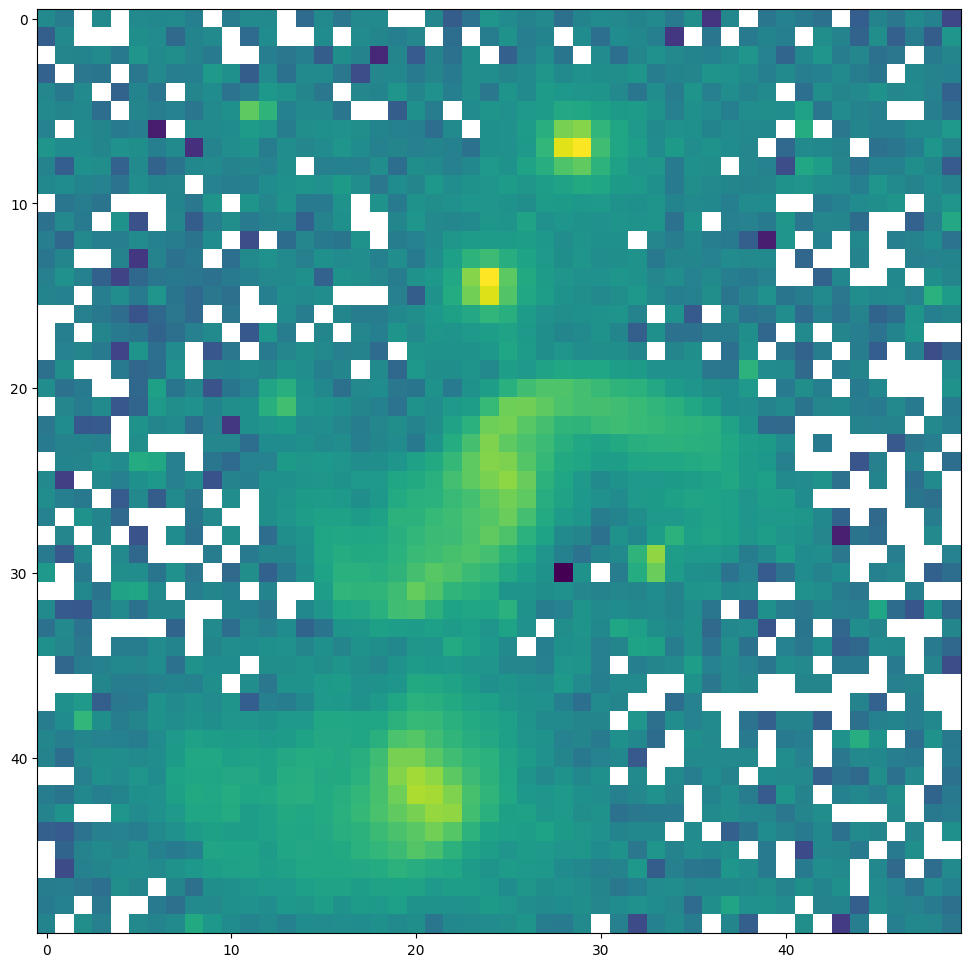

In [3]:
plt.figure(figsize = (12,12))
plt.imshow(np.log10(observed_arr) - 48.6)
plt.show()

In [4]:
coords_df = pd.read_csv('C:/Users/oryan/Documents/Observational_Dataset/data/all_coords.csv', index_col = 0)

In [5]:
arp256_coords = coords_df.query('Names == " Arp256"')

In [6]:
arp256_coords

,Prim_RA,Prim_DEC,Names,Sec_RA,Sec_DEC
4,4.708583,-10.361625,Arp256,4.711833,-10.37695


In [7]:
arp256_ob = (
    arp256_coords
    .assign(prim_coords = arp256_coords.apply(lambda row: SkyCoord(ra = row.Prim_RA  * u.deg, dec = row.Prim_DEC * u.deg, frame = 'fk5'), axis=1))
    .assign(sec_coords = arp256_coords.apply(lambda row: SkyCoord(ra = row.Sec_RA  * u.deg, dec = row.Sec_DEC * u.deg, frame = 'fk5'), axis=1))    
)

In [8]:
dra, ddec = arp256_ob.sec_coords.iloc[0].spherical_offsets_to(arp256_ob.prim_coords.iloc[0])

In [9]:
dra_m = dra.to(u.arcmin)

In [10]:
ddec_m = ddec.to(u.arcmin)

In [11]:
cosmo = FlatLambdaCDM(H0=67.8 * u.km / u.s / u.Mpc, Tcmb0=2.275 * u.K, Om0 = 0.308)

In [12]:
z = 0.0273

In [13]:
conversion = cosmo.kpc_proper_per_arcmin(z)

In [14]:
x = conversion * dra_m
y = conversion * ddec_m

In [15]:
x

<Quantity -6.51498563 kpc>

In [16]:
y

<Quantity 31.22992183 kpc>

In [17]:
sim_x = x / (15 * u.kpc)
sim_y = y / (15 * u.kpc)

In [18]:
sim_x

<Quantity -0.43433238>

In [19]:
sim_y

<Quantity 2.08199479>

In [20]:
Resolution = (conversion).to(u.kpc / u.arcsec) * (0.396 * u.arcsec) / (15 * u.kpc) * 8

In [21]:
Resolution

<Quantity 0.1195535>

In [22]:
pixel_x = sim_x / Resolution
pixel_y = sim_y / Resolution

In [23]:
pixel_x

<Quantity -3.63295412>

In [24]:
pixel_y

<Quantity 17.41475417>

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


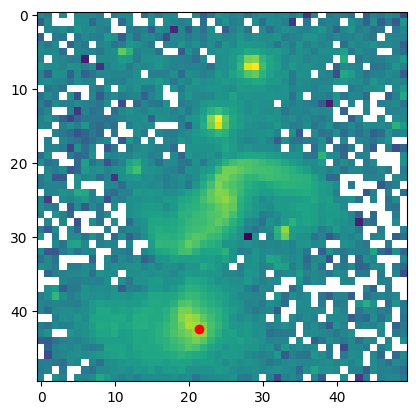

In [25]:
plt.figure()
plt.imshow(np.log10(observed_arr) - 48.6)
plt.scatter(pixel_x + 25, pixel_y + 25, color='r')
plt.show()

In [26]:
float(Resolution)

0.11955349864681465

### Finding Which Matches

In [28]:
redshifts = pd.read_csv('C:/Users/oryan/Documents/PySPAM_Original_Python_MCMC/APySPAM_MCMC/Redshifts/Redshifts.csv', index_col = 0)
coordinates = pd.read_csv('C:/Users/oryan/Documents/Observational_Dataset/data/all_coords.csv', index_col = 0)

In [29]:
redshifts

,block_reduce,Names,Redshift,neg,transpose
0,10,Arp240,0.02250,rereduce,rereduce
1,18,Arp290,0.01171,y,n
2,8,Arp142,0.02329,y,n
3,8,Arp318,0.01320,xy,y
4,8,Arp256,0.02730,n,n
5,8,UGC11751,0.02909,y,n
6,32,Arp104,0.01082,y,n
7,2,Heart,0.04000,rereduce,rereduce
8,22,Arp285,0.00967,rereduce,rereduce
9,90,Arp214,0.00331,y,n


In [318]:
gal_names = list(
    coordinates
    .Names
)

In [31]:
redshifts.head()

,block_reduce,Names,Redshift,neg,transpose
0,10,Arp240,0.02250,rereduce,rereduce
1,18,Arp290,0.01171,y,n
2,8,Arp142,0.02329,y,n
3,8,Arp318,0.01320,xy,y
4,8,Arp256,0.02730,n,n


In [322]:
coordinates.head()

,Prim_RA,Prim_DEC,Names,Sec_RA,Sec_DEC
0,204.970333,0.839844,Arp240,204.990208,0.830667
1,30.957167,14.738644,Arp290,30.937292,14.709056
2,144.433333,2.760164,Arp142,144.437875,2.746886
3,32.352333,-10.136006,Arp318,32.337292,-10.133158
4,4.708583,-10.361625,Arp256,4.711833,-10.376950


In [331]:
x

<Quantity -33.57177826 kpc>

In [363]:
for i in tqdm(gal_names):
    name = i.strip()
    
    try:
        observed_arr = np.load(f'C:/Users/oryan/Documents/PySPAM_Original_Python_MCMC/APySPAM_MCMC/All_Inputs/{name}.npy')
    except:
        continue
    
    z_row = redshifts.query('Names == @name')
    row = coordinates.query('Names == @i')
    
    if len(row) < 0.5:
        continue
    
    z = z_row.Redshift.iloc[0]
    block_reduce = z_row.block_reduce.iloc[0]
    
    prim_coord = SkyCoord(ra = row.Prim_RA.iloc[0]* u.deg, dec = row.Prim_DEC.iloc[0] * u.deg, frame = 'fk5')
    sec_coord = SkyCoord(ra = row.Sec_RA.iloc[0] * u.deg, dec = row.Sec_DEC.iloc[0] * u.deg, frame = 'fk5')
    
    dra, ddec = sec_coord.spherical_offsets_to(prim_coord)
    
    dra_as = dra.to(u.arcsec)
    ddec_as = ddec.to(u.arcsec)
    
    conversion = cosmo.kpc_proper_per_arcmin(z).to(u.kpc / u.arcsec)
    
    x = conversion * dra_as
    y = conversion * ddec_as
    
    Resolution = (conversion) * (0.396 * u.arcsec) * block_reduce
    
    pixel_x = x / Resolution
    pixel_y = y / Resolution
    
    flip_x = -x / Resolution
    flip_y = -y / Resolution
    
    plt.figure(figsize = (12,12))
    plt.imshow(np.log10(observed_arr) - 48.6)
    plt.scatter(pixel_x + 25, pixel_y + 25, color='r', s = 100)
    plt.savefig(f'C:/Users/oryan/Documents/testing-coords/{name}.jpeg')
    plt.close()
    
    plt.figure(figsize = (12,12))
    plt.imshow(np.log10(observed_arr) - 48.6)
    plt.scatter(pixel_x + 25, flip_y + 25, color='r', s = 100)
    plt.savefig(f'C:/Users/oryan/Documents/testing-coords/{name}_neg_y.jpeg')
    plt.close()
    
    plt.figure(figsize = (12,12))
    plt.imshow(np.log10(observed_arr) - 48.6)
    plt.scatter(flip_x + 25, pixel_y + 25, color='r', s = 100)
    plt.savefig(f'C:/Users/oryan/Documents/testing-coords/{name}_neg_x.jpeg')
    plt.close()
    
    plt.figure(figsize = (12,12))
    plt.imshow(np.log10(observed_arr) - 48.6)
    plt.scatter(flip_x + 25, flip_y + 25, color='r', s = 100)
    plt.savefig(f'C:/Users/oryan/Documents/testing-coords/{name}_both.jpeg')
    plt.close()
    
    plt.figure(figsize = (12,12))
    plt.imshow(np.log10(observed_arr) - 48.6)
    plt.scatter(pixel_y + 25, pixel_x + 25, color='r', s = 100)
    plt.savefig(f'C:/Users/oryan/Documents/testing-coords/{name}_transpose.jpeg')
    plt.close()
    
    plt.figure(figsize = (12,12))
    plt.imshow(np.log10(observed_arr) - 48.6)
    plt.scatter(flip_y + 25, pixel_x + 25, color='r', s = 100)
    plt.savefig(f'C:/Users/oryan/Documents/testing-coords/{name}_transpose_neg_x.jpeg')
    plt.close()
    
    plt.figure(figsize = (12,12))
    plt.imshow(np.log10(observed_arr) - 48.6)
    plt.scatter(pixel_y + 25, flip_x + 25, color='r', s = 100)
    plt.savefig(f'C:/Users/oryan/Documents/testing-coords/{name}_transpose_neg_y.jpeg')
    plt.close()
    
    plt.figure(figsize = (12,12))
    plt.imshow(np.log10(observed_arr) - 48.6)
    plt.scatter(flip_y + 25, flip_x + 25, color='r', s = 100)
    plt.savefig(f'C:/Users/oryan/Documents/testing-coords/{name}_transpose_both.jpeg')
    plt.close()

  0%|          | 0/54 [00:00<?, ?it/s]C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in log10
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log10
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in log10
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in log10
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in log10
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in log10
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:76: Runti